In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Загрузка датасета

Библиотеки

In [ ]:
import os
import tensorflow as tf

Пути к датасету


In [ ]:
dir_google_drive = "/content/drive/MyDrive/dataset"
train_data = "images_train_test_val/train"
test_data = "images_train_test_val/test"
valid_data = "images_train_test_val/validation"

dir_train_data = os.path.join(dir_google_drive, train_data)
dir_test_data = os.path.join(dir_google_drive, test_data)
dir_valid_data = os.path.join(dir_google_drive, valid_data)

Загрузка выборки(без предобработки)

In [ ]:
param = dict(
    image_size = (224,224),
    label_mode = "categorical",
    batch_size = 32
    )

train_data = tf.keras.preprocessing.image_dataset_from_directory(dir_train_data,**param)
test_data = tf.keras.preprocessing.image_dataset_from_directory(dir_test_data,**param)
val_data = tf.keras.preprocessing.image_dataset_from_directory(dir_valid_data,**param)


Found 7350 files belonging to 21 classes.
Found 1050 files belonging to 21 classes.
Found 2100 files belonging to 21 classes.


Проверяем выборку

# Работа с моделью

Библиотеки

In [ ]:
import tensorflow as tf
import numpy as np
import os

Переменные

In [ ]:
dir_google_drive = "/content/drive/MyDrive"
dir_local = "Models"

epochs = 10
testing_steps = len(train_data)
validation_steps = len(val_data)

NameError: ignored

Создание модели

In [ ]:
def create_model():
  eff_base = tf.keras.applications.EfficientNetB5(include_top = False)
  #eff_base.trainable = False
  
  inputs = tf.keras.Input(shape=(224,224,3))
  x = eff_base(inputs)
  x = tf.keras.layers.GlobalAveragePooling2D()(x)
  outputs = tf.keras.layers.Dense(21, activation="softmax")(x)
  return tf.keras.Model(inputs, outputs)

Сохранение и загрузка модели

In [ ]:
def save_weights(model, path, name):
  model.save_weights(os.path.join(path, name))

def load_weights(model, path, name):
  model.load_weights(os.path.join(path, name))

def save_model(model, path):
  model.save(path)
  np.save(os.path.join(path,'history.npy'), model.history)

def load_model(path):
  return tf.keras.models.load_model(path), np.load(os.path.join(path,'history.npy'),allow_pickle='TRUE').item()

Компиляция модели

In [ ]:
eff_model =  create_model()

eff_model.compile(
    loss = tf.keras.losses.categorical_crossentropy,
    optimizer = tf.keras.optimizers.Adam(learning_rate= 0.001),
    metrics = ["accuracy"]
)

Обучение

In [ ]:
eff_model.fit( train_data,
             epochs = epochs,
             steps_per_epoch = testing_steps,
             validation_data = val_data,
             validation_steps = validation_steps
             )

Epoch 1/10
230/230 [==============================] - 1251s 5s/step - loss: 0.4297 - accuracy: 0.8790 - val_loss: 0.3172 - val_accuracy: 0.9257
Epoch 2/10
230/230 [==============================] - 242s 1s/step - loss: 0.1692 - accuracy: 0.9501 - val_loss: 0.4044 - val_accuracy: 0.9424
Epoch 3/10
230/230 [==============================] - 246s 1s/step - loss: 0.1257 - accuracy: 0.9653 - val_loss: 0.1991 - val_accuracy: 0.9533
Epoch 4/10
230/230 [==============================] - 246s 1s/step - loss: 0.1231 - accuracy: 0.9634 - val_loss: 0.1766 - val_accuracy: 0.9605
Epoch 5/10
230/230 [==============================] - 246s 1s/step - loss: 0.0744 - accuracy: 0.9769 - val_loss: 0.1840 - val_accuracy: 0.9576
Epoch 6/10
230/230 [==============================] - 248s 1s/step - loss: 0.0621 - accuracy: 0.9822 - val_loss: 0.0555 - val_accuracy: 0.9857
Epoch 7/10
230/230 [==============================] - 248s 1s/step - loss: 0.0592 - accuracy: 0.9827 - val_loss: 0.1160 - val_accuracy: 0.975

Сохранение модели

In [ ]:
save_model(eff_model, '/content/drive/MyDrive/Models/Model_1')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Model_1/assets
INFO:tensorflow:Assets written to: ram://db9090d6-c1ae-4d2a-8aec-ba52a4d46c9a/assets


In [ ]:
model, history = load_model(os.path.join(dir_google_drive, "Model_1"))

# Графики

Библиотеки

In [ ]:
import matplotlib.pyplot as plt

Методы для вывода графиков

In [ ]:
def show_final_history(history):
    
    plt.style.use("ggplot")
    fig, ax = plt.subplots(1,2,figsize=(15,5))
    
    ax[0].set_title('Loss')
    ax[1].set_title('Accuracy')
    
    ax[0].plot(history.history['loss'], label="Training Loss")
    ax[0].plot(history.history['val_loss'], label="Validation Loss")
    ax[1].plot(history.history['accuracy'], label="Training Accuracy")
    ax[1].plot(history.history['val_accuracy'], label="Validation Accuracy")
    
    ax[0].legend(loc='upper right')
    ax[1].legend(loc='lower right')
    
    plt.show();
    pass

Вывод

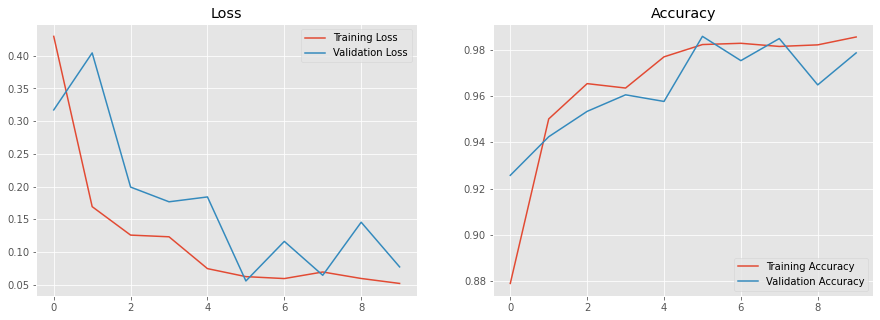

In [ ]:

#print(eff_model.history)
show_final_history(history)

In [ ]:
model_evaluation = model.evaluate(test_data)
print(f"Model Accuarcy: {model_evaluation[1] * 100: 0.2f} %")

33/33 [==============================] - 149s 3s/step - loss: 0.0895 - accuracy: 0.9686
Model Accuarcy:  96.86 %


# Нужный мусор

Предобработка выборки

In [ ]:
train_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1/255.,       # коэффициент масштабирования
    #shear_range = 0.2,      # Интенсивность сдвига
    #zoom_range = 0.2,       # Диапазон случайного увеличения
    #horizontal_flip = True  # Произвольный поворот по горизонтали
    )

test_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1/255.)
val_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1/255.)

Загрузка выборки (с предобработкой)

In [ ]:
param = dict(
    target_size = (224,224),
    class_mode = "categorical",
    batch_size = 32
    )

train_data = train_gen.flow_from_directory(dir_train_data,**param)
test_data = test_gen.flow_from_directory(dir_test_data,**param)
val_data = val_gen.flow_from_directory(dir_valid_data,**param)

Found 7350 images belonging to 21 classes.
Found 1050 images belonging to 21 classes.
Found 2100 images belonging to 21 classes.


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
#class_label = list(train_data.class_indices.keys())
image_set, label_set = train_data.next()  

plt.figure(figsize=(16,12))
for i in range(12):
  plt.subplot(3,4,i+1)
  plt.imshow(image_set[i])
  #plt.title(class_label[tf.argmax(label_set[i])])
  plt.title(class_label[tf.argmax(label_set[i])])
  plt.axis("off")

AttributeError: ignored

In [ ]:
from tensorflow.keras import layers

model = tf.keras.Sequential([
                             layers.Conv2D(filters= 32, kernel_size= 2, activation="relu", input_shape=(224,224,3)),
                             layers.MaxPooling2D(pool_size= 2),

                             layers.Conv2D(filters = 32, kernel_size= 2, activation="relu"),
                             layers.MaxPooling2D(pool_size= 2),

                             layers.Conv2D(filters= 32, kernel_size= 2, activation= "relu"),
                             layers.MaxPooling2D(pool_size=2),

                             layers.Conv2D(filters= 32, kernel_size= 2, activation= "relu"),
                             layers.MaxPooling2D(pool_size=2),

                            
                             layers.Conv2D(filters= 32, kernel_size= 2, activation= "relu"),
                             layers.Conv2D(filters= 32, kernel_size= 2, activation= "relu"),
                             layers.Conv2D(filters= 32, kernel_size= 2, activation= "relu"),

                             layers.Flatten(),

                             layers.Dense(256, activation="relu"),

                             layers.Dense(21, activation="softmax")


])

In [ ]:
model.compile(
    loss = tf.keras.losses.categorical_crossentropy,
    optimizer = tf.keras.optimizers.Adam(learning_rate= 0.001),
    metrics = ["accuracy"]
)

In [ ]:
epochs = 10
testing_steps = len(train_data)
validation_steps = len(val_data)

In [ ]:
model.fit(
    train_data,
    epochs = epochs,
    steps_per_epoch = testing_steps,
    validation_data = val_data,
    validation_steps = validation_steps
)

In [ ]:
model_evaluation = model.evaluate(test_data)
print(f"Model Accuarcy: {model_evaluation[1] * 100: 0.2f} %")

33/33 [==============================] - 268s 8s/step - loss: 1.3317 - accuracy: 0.5514
